<a href="https://colab.research.google.com/github/yudiitalo/Avaliacao-pratica-Clusterizacao-de-Vinhos-com-PCA-e-K-Means/blob/main/Clusteriza%C3%A7%C3%A3o_de_Vinhos_com_PCA_e_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

In [35]:
# 1. Carregar e Preparar os Dados
# ------------------------------------
# Carrega o dataset de vinhos
wine_data = load_wine()
X = wine_data.data
y_true = wine_data.target # Rótulos verdadeiros (usaremos apenas para validação no final)

# É crucial escalar os dados antes do PCA!
# O PCA é sensível à escala das variáveis.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Formato original dos dados:", X.shape)

Formato original dos dados: (178, 13)


In [36]:
# 2. Aplicar o PCA
# ------------------------------------
# Vamos reduzir as 13 dimensões para 2 componentes principais.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Cria um DataFrame com os componentes principais para facilitar a visualização
pca_df = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])

print("Formato dos dados após o PCA:", X_pca.shape)
print(f"Variância explicada pelos 2 componentes: {sum(pca.explained_variance_ratio_) * 100:.2f}%")


Formato dos dados após o PCA: (178, 2)
Variância explicada pelos 2 componentes: 55.41%


In [37]:
# 3. Aplicar o K-Means nos Dados Reduzidos
# -----------------------------------------
# O número de clusters (k) é 3, pois sabemos que existem 3 tipos de vinho.
# Em um problema real, você usaria métodos como o "Método do Cotovelo" para encontrar o k ideal.
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_pca)

# Adiciona os clusters encontrados ao nosso DataFrame do PCA
pca_df['Cluster_KMeans'] = y_kmeans

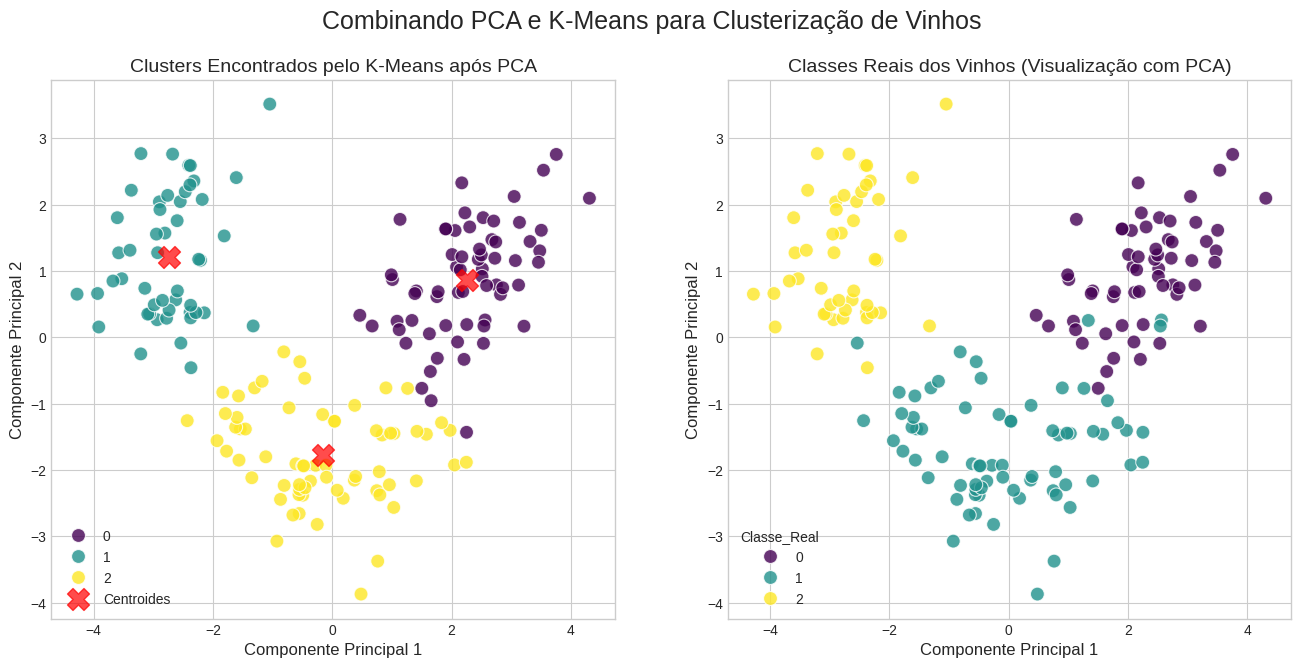

In [38]:
# 4. Visualizar os Resultados
# -----------------------------------------
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Gráfico 1: Clusters encontrados pelo K-Means
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='Cluster_KMeans', data=pca_df, palette='viridis', s=100, alpha=0.8, ax=ax1)
ax1.set_title('Clusters Encontrados pelo K-Means após PCA', fontsize=14)
ax1.set_xlabel('Componente Principal 1', fontsize=12)
ax1.set_ylabel('Componente Principal 2', fontsize=12)

# Centros dos clusters
centers = kmeans.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=250, alpha=0.7, marker='X', label='Centroides')
ax1.legend()

# Gráfico 2: Rótulos Verdadeiros (para comparação)
pca_df['Classe_Real'] = y_true # Adiciona os rótulos verdadeiros para comparar
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='Classe_Real', data=pca_df, palette='viridis', s=100, alpha=0.8, ax=ax2)
ax2.set_title('Classes Reais dos Vinhos (Visualização com PCA)', fontsize=14)
ax2.set_xlabel('Componente Principal 1', fontsize=12)
ax2.set_ylabel('Componente Principal 2', fontsize=12)

plt.suptitle('Combinando PCA e K-Means para Clusterização de Vinhos', fontsize=18)
plt.show()